## Credit Risk Modeling

* Analyze & Breakdown german credit Portfolio to learn about possible trends
 * POC Credit Scoring model 
   * **Project Goal:** The credit risk application scorecard would assist in evaluating probability of customer defaults. This end-to-end advanced credit risk analytics would focuses on:
     * Meeting business goals 
     * Optimization of the overall customer acquisition funnel
     * Build a holistic customer risk profile
  ##### PART 1 Data Preparation and Exporatory Data Analysis

  * Data Audit: Verifying data quality
  * Distribution of categories for each variable
  * Trend of variable vs default 
  * Handle missing values

    
 ##### PART 2 Feature Engineering
  * Cross variables
  * Ratios

  ##### PART 3 Characteristics Analysis
  * Characteristics Analysis Report
    * Fine Classing 
    * Coarse Classing 
    * Information value 
    * WoE transformations 
    * Univariate Analysis/ Feature Selection
  
 ##### PART 4 Scorecard Development
  * Modelling Phase
   * Variable Selection
  * Model Correlation Analysis
  * Model evaluation: 
     * Hold Out Sample Validation


In [38]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt


#import utility file
%run utils.ipynb

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Util Libraries successfully imported


In [39]:
#read data
data =pd.read_csv('GermanCredit.csv')
data.head()

,Unnamed: 0,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job,gender
0,0,-43.0,6,critical,radio/tv,1169,NaN,13 years,4,single,none,6 years,real estate,67,none,own,2,0,1,2.349340e+09,yes,skilled employee,male
1,1,75.0,48,repaid,radio/tv,5951,89.0,2 years,2,NaN,none,5 months,real estate,22,none,own,1,1,1,NaN,yes,skilled employee,female
2,2,NaN,12,critical,education,2096,24.0,5 years,2,single,none,4 years,real estate,49,none,own,1,0,2,NaN,yes,unskilled resident,male
3,3,-32.0,42,repaid,furniture,7882,9.0,5 years,2,single,guarantor,13 years,building society savings,45,none,for free,1,0,2,NaN,yes,skilled employee,male
4,4,-23.0,24,delayed,car (new),4870,43.0,3 years,3,single,none,13 years,unknown/none,53,none,for free,2,1,2,NaN,yes,skilled employee,male


##### Numerical data analysis

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1000 non-null   int64  
 1   checking_balance      606 non-null    float64
 2   months_loan_duration  1000 non-null   int64  
 3   credit_history        1000 non-null   object 
 4   purpose               1000 non-null   object 
 5   amount                1000 non-null   int64  
 6   savings_balance       817 non-null    float64
 7   employment_length     938 non-null    object 
 8   installment_rate      1000 non-null   int64  
 9   personal_status       690 non-null    object 
 10  other_debtors         1000 non-null   object 
 11  residence_history     870 non-null    object 
 12  property              1000 non-null   object 
 13  age                   1000 non-null   int64  
 14  installment_plan      1000 non-null   object 
 15  housing               

### Variance Threshold
Variance Threshold is a feature selector that removes all the low variance features from the dataset that are of no great use in modeling. It looks only at the features (x), not the desired outputs/target (y), and can thus be used for unsupervised learning.

  - High Variance in predictors: Good Indication
  - Low Variance predictors: Not good for model
We can drop constant features using Sklearn’s Variance Threshold. Default Value of Threshold is 0


    -  If Variance Threshold = 0 (Remove Constant Features )
    -  If Variance Threshold > 0 (Remove Quasi-Constant Features )
    - Constant Feature: Same value in all the records.
  - Quasi Constant Feature: One of the values is dominant 99.9%.

In [41]:
from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_constant_features
constant_features = get_constant_features(data, threshold=0, dropna=False)
constant_features


,Desc,Var,Value,Perc
0,Quasi Constant,foreign_worker,yes,96.3
1,Quasi Constant,other_debtors,none,90.7
2,Quasi Constant,dependents,1,84.5
3,Quasi Constant,installment_plan,none,81.4
4,Quasi Constant,housing,own,71.3
5,Quasi Constant,default,0,70.0
6,Quasi Constant,gender,male,69.0
7,Quasi Constant,existing_credits,1,63.3
8,Quasi Constant,job,skilled employee,63.0
9,Quasi Constant,telephone,NaN,59.6


none of the variables have constant or quansi constant values of 99%

### Feature Engineering
This additional features are required for development for our loan credit scoring model We would also obtain some derived features or crossed variables. 
Additional features can boost the performance of the model and hence the accuracy of the decisioning process.
Different approaches should be considered since Feature Engineering is considered a serious competitive advantage in 
terms of model development:
  • Ratios, e.g.:  saving_balance/ employment_length 
  etc.
  • Cross variables: Age & Gender (Age >=30 & Gender Male, Age >=30 and gender Female)

  *** No time to explore this

##### handling missing values
missing values can be handled in different ways. if the missing proportion is greater than or equals to 50%, it's best to drop the entire column, if it is less than 50%, we can impute the missing values based on the variable itself

In [42]:
#assuming missing values for balance variables like 'checking_balance', 'savings_balance' implies there's zero balance
data['savings_balance'].fillna(0, inplace=True)
data['checking_balance'].fillna(0, inplace=True)
data.isna().sum()

Unnamed: 0                0
checking_balance          0
months_loan_duration      0
credit_history            0
purpose                   0
amount                    0
savings_balance           0
employment_length        62
installment_rate          0
personal_status         310
other_debtors             0
residence_history       130
property                  0
age                       0
installment_plan          0
housing                   0
existing_credits          0
default                   0
dependents                0
telephone               596
foreign_worker            0
job                       0
gender                    0
dtype: int64

In [43]:
#get the residence history in months
# Split the series into two using ''
split_data = data['residence_history'].str.split(' ', n=1, expand=True)

# Assign the split parts to separate variables
data['res_split1'] = split_data[0].astype(float)
data['res_split2'] = split_data[1]
data['residence_history_in mnths'] = np.where(data['res_split2']=='years', data['res_split1']*12, data['res_split1'])

split_data = data['employment_length'].str.split(' ', n=1, expand=True)

# Assign the split parts to separate variables
data['emp_split1'] = split_data[0].astype(float)
data['emp_split2'] = split_data[1]
data['employment_length_in mnths'] = np.where(data['emp_split2']=='years', data['emp_split1']*12, data['emp_split1'])
# data.sample(30)

In [44]:
#fill n=missing with modes for categorical data
data['personal_status'].fillna(data['personal_status'].mode()[0], inplace=True)

### Characteristic  Analysis

This concerns all available characteristics that have been initially considered for modelling. 
The first step in preparing the characteristics for modelling is to produce a fine classing for each variable. In creating fine classes, the observations are split into a set of non-overlapping ranges to produce statistics, such as the GB odds, GB index 
and bad rate, which could not be produced at individual observation level. 
Numeric variables are fine classed by dividing the population into intervals of a specified size. Ranges are usually chosen 
such that each band consists of 2% to 5% of the sample and are then adjusted considering the specifics relating to the 
variable values and/or meaning. 
Additionally, specific values of interest, such as zero, missing values or special values, are split out into standalone 
attributes – by isolating such instances, the analysis accuracy can increase by scoring these specific cases separately from 
the remaining characteristic values.
Fine classing for non-numeric variables is kept at a single value level. 

One hot encoding of categorical variables can lead to vast number of columns which might result in a not so goo model. Using weight of evidence (WoE) approach solves the problem 

In [45]:
#split data into train and test

Train =  data.sample(frac=0.75, random_state=42)
Test = data[~(data['Unnamed: 0'].isin(Train['Unnamed: 0'].values))]
print(Train.shape)
print(Test.shape)

(750, 29)
(250, 29)


Regrouping most of the variable so as to reduce the number of categories

#### purpose

In [46]:
Train['purpose_grped'] = np.where(Train['purpose'].isin(['domestic appliances','radio/tv' ]), 'domestic appliance', 
                        np.where(Train['purpose'].isin(['car (new)', 'car (used)']), 'Car',
                        np.where(Train['purpose'].isin(['others','retraining', 'repairs' ]), 'Others',    Train['purpose'])))
Train['purpose_grped'].value_counts()

Car                   244
domestic appliance    210
furniture             143
business               76
education              43
Others                 34
Name: purpose_grped, dtype: int64

In [47]:
Test['purpose_grped'] = np.where(Test['purpose'].isin(['domestic appliances','radio/tv' ]), 'domestic appliance', 
                        np.where(Test['purpose'].isin(['car (new)', 'car (used)']), 'Car',
                        np.where(Test['purpose'].isin(['others','retraining', 'repairs' ]), 'Others',    Test['purpose'])))
Test['purpose_grped'].value_counts()

Car                   93
domestic appliance    82
furniture             38
business              21
Others                 9
education              7
Name: purpose_grped, dtype: int64

In [48]:
Train['GBFlag'] = data['default'].replace({1:'Bad',0:'Good'})
Test['GBFlag'] = data['default'].replace({1:'Bad',0:'Good'})
woe_cat(Train, 'purpose_grped', 'GBFlag')

GBFlag,Bad,Good,Freq,Proptn,% Good,% Bad,Bad Rate,GoodBaddOdds,WOE,class IV,Variable IV
purpose_grped,,,,,,,,,,,
domestic appliance,48,162,210,0.280000,0.307985,0.214286,0.228571,3.38,-0.362740,0.033988,0.063446
Car,73,171,244,0.325333,0.325095,0.325893,0.299180,2.34,0.002451,0.000002,0.063446
furniture,46,97,143,0.190667,0.184411,0.205357,0.321678,2.11,0.107586,0.002254,0.063446
Others,12,22,34,0.045333,0.041825,0.053571,0.352941,1.83,0.247519,0.002907,0.063446
business,27,49,76,0.101333,0.093156,0.120536,0.355263,1.81,0.257672,0.007055,0.063446
education,18,25,43,0.057333,0.047529,0.080357,0.418605,1.39,0.525151,0.017240,0.063446


In [49]:
Train['purpose_grped'] = np.where(Train['purpose_grped'].isin(['Others', 'business']), 'Others', Train['purpose_grped'])
Test['purpose_grped'] = np.where(Test['purpose_grped'].isin(['Others', 'business']), 'Others', Test['purpose_grped'])

#### housing

In [50]:

woe_cat(Train, 'job', 'GBFlag')

GBFlag,Bad,Good,Freq,Proptn,% Good,% Bad,Bad Rate,GoodBaddOdds,WOE,class IV,Variable IV
job,,,,,,,,,,,
unskilled resident,44,112,156,0.208000,0.212928,0.196429,0.282051,2.55,-0.080654,0.001331,0.022667
skilled employee,135,338,473,0.630667,0.642586,0.602679,0.285412,2.50,-0.064116,0.002559,0.022667
unemployed non-resident,6,11,17,0.022667,0.020913,0.026786,0.352941,1.83,0.247519,0.001454,0.022667
mangement self-employed,39,65,104,0.138667,0.123574,0.174107,0.375000,1.67,0.342830,0.017324,0.022667


In [51]:
Train['job_grped'] = np.where(Train['job'].isin(['unemployed non-resident', 'mangement self-employed']), 'Others', Train['job'])
Test['job_grped'] = np.where(Test['job'].isin(['unemployed non-resident', 'mangement self-employed']), 'Others', Test['job'])

Train['job_grped'].value_counts()

skilled employee      473
unskilled resident    156
Others                121
Name: job_grped, dtype: int64

#### property

In [52]:

woe_cat(Train, 'property', 'GBFlag')

GBFlag,Bad,Good,Freq,Proptn,% Good,% Bad,Bad Rate,GoodBaddOdds,WOE,class IV,Variable IV
property,,,,,,,,,,,
real estate,46,167,213,0.284000,0.317490,0.205357,0.215962,3.63,-0.435697,0.048856,0.08167
other,74,168,242,0.322667,0.319392,0.330357,0.305785,2.27,0.033756,0.000370,0.08167
building society savings,59,121,180,0.240000,0.230038,0.263393,0.327778,2.05,0.135402,0.004516,0.08167
unknown/none,45,70,115,0.153333,0.133080,0.200893,0.391304,1.56,0.411822,0.027927,0.08167


#### credit_history

In [53]:

woe_cat(Train, 'credit_history', 'GBFlag')

GBFlag,Bad,Good,Freq,Proptn,% Good,% Bad,Bad Rate,GoodBaddOdds,WOE,class IV,Variable IV
credit_history,,,,,,,,,,,
critical,41,178,219,0.292,0.338403,0.183036,0.187215,4.34,-0.614556,0.095482,0.245433
delayed,22,50,72,0.096,0.095057,0.098214,0.305556,2.27,0.032675,0.000103,0.245433
repaid,121,269,390,0.520,0.511407,0.540179,0.310256,2.22,0.054734,0.001575,0.245433
fully repaid this bank,23,19,42,0.056,0.036122,0.102679,0.547619,0.83,1.044710,0.069533,0.245433
fully repaid,17,10,27,0.036,0.019011,0.075893,0.629630,0.59,1.384283,0.078740,0.245433


In [54]:
Train['credit_history_grped']= np.where(Train['credit_history'].isin(['delayed', 'repaid']), 'delayed/repaid',
                              np.where(Train['credit_history'].isin(['fully repaid this bank', 'fully repaid']), 'fully repaid', Train['credit_history']))


Test['credit_history_grped']= np.where(Test['credit_history'].isin(['delayed', 'repaid']), 'delayed/repaid',
                              np.where(Test['credit_history'].isin(['fully repaid this bank', 'fully repaid']), 'fully repaid', Test['credit_history']))
Test['credit_history_grped'].value_counts()

delayed/repaid    156
critical           74
fully repaid       20
Name: credit_history_grped, dtype: int64

In [55]:
# ## Fine Classsing (Age)
Train['Age_fine'] = pd.qcut(Train['age'], q=10)
woe_num(Train,'Age_fine', 'GBFlag')

GBFlag,Bad,Good,Freq,Percentage,% Good,% Bad,Bad Rate,GoodBaddOdds,WOE,IV
Age_fine,,,,,,,,,,
"(18.999, 23.0]",33,47,80,10.7,8.9,14.7,41.2,1.42,-0.501796,2.910418
"(23.0, 26.0]",30,64,94,12.5,12.2,13.4,31.9,2.13,-0.093819,0.112583
"(26.0, 28.0]",22,46,68,9.1,8.7,9.8,32.4,2.09,-0.119059,0.130965
"(28.0, 31.0]",26,59,85,11.3,11.2,11.6,30.6,2.27,-0.035091,0.014037
"(31.0, 33.0]",18,33,51,6.8,6.3,8.0,35.3,1.83,-0.238892,0.406116
"(33.0, 36.0]",20,70,90,12.0,13.3,8.9,22.2,3.50,0.401713,1.767536
"(36.0, 39.0]",13,45,58,7.7,8.6,5.8,22.4,3.46,0.393904,1.102932
"(39.0, 44.2]",24,50,74,9.9,9.5,10.7,32.4,2.08,-0.118952,0.142742
"(44.2, 52.1]",16,59,75,10.0,11.2,7.1,21.3,3.69,0.455819,1.868858


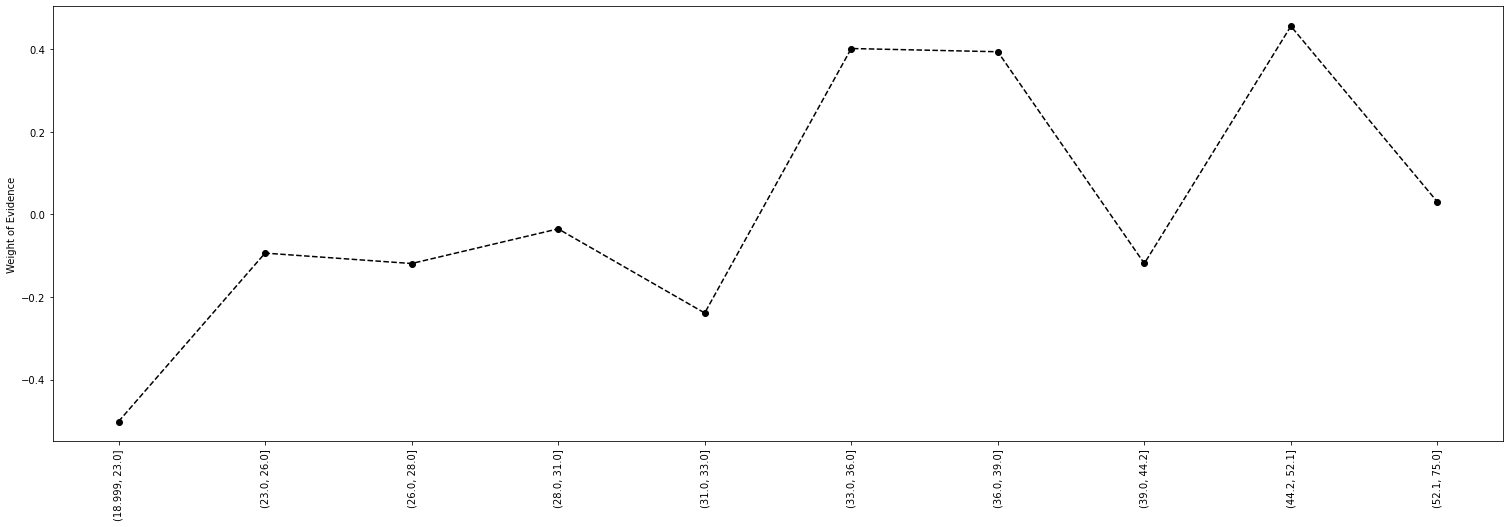

In [56]:
plot_by_woe(woe_num(Train,'Age_fine', 'GBFlag'), 90)

In [57]:
# Bin Age
bins = [18, 24, 34, 40, 45, 53, 76]
Train['Age_grped'] = pd.cut(Train['age'], bins, precision=0, include_lowest=True, right=False,)
Test['Age_grped'] = pd.cut(Test['age'], bins, precision=0, include_lowest=True, right=False,)

In [58]:
Train['residence_history_in mnths'].fillna(-500, inplace=True)
Train['employment_length_in mnths'].fillna(-500, inplace=True)

Test['residence_history_in mnths'].fillna(-500, inplace=True)
Test['employment_length_in mnths'].fillna(-500, inplace=True)

In [59]:
Train.isna().sum()

Unnamed: 0                      0
checking_balance                0
months_loan_duration            0
credit_history                  0
purpose                         0
amount                          0
savings_balance                 0
employment_length              46
installment_rate                0
personal_status                 0
other_debtors                   0
residence_history             104
property                        0
age                             0
installment_plan                0
housing                         0
existing_credits                0
default                         0
dependents                      0
telephone                     455
foreign_worker                  0
job                             0
gender                          0
res_split1                    104
res_split2                    104
residence_history_in mnths      0
emp_split1                     46
emp_split2                     46
employment_length_in mnths      0
purpose_grped 

In [60]:
# ## Fine Classsing (residence_history_in mnths)
Train['residence_history_in mnths_fine'] = pd.qcut(Train['residence_history_in mnths'], q=10, duplicates='drop')
woe_num(Train,'residence_history_in mnths_fine', 'GBFlag')

GBFlag,Bad,Good,Freq,Percentage,% Good,% Bad,Bad Rate,GoodBaddOdds,WOE,IV
residence_history_in mnths_fine,,,,,,,,,,
"(-500.001, 2.0]",55,114,169,22.5,21.7,24.6,32.5,2.07,-0.125434,0.363759
"(2.0, 6.0]",20,44,64,8.5,8.4,8.9,31.2,2.20,-0.057820,0.028910
"(6.0, 10.0]",22,55,77,10.3,10.5,9.8,28.6,2.50,0.068993,0.048295
"(10.0, 24.0]",22,50,72,9.6,9.5,9.8,30.6,2.27,-0.031091,0.009327
"(24.0, 72.0]",21,54,75,10.0,10.3,9.4,28.0,2.57,0.091434,0.082291
"(72.0, 132.0]",26,57,83,11.1,10.8,11.6,31.3,2.19,-0.071459,0.057167
"(132.0, 180.0]",16,51,67,8.9,9.7,7.1,23.9,3.19,0.312031,0.811281
"(180.0, 240.0]",18,54,72,9.6,10.3,8.0,25.0,3.00,0.252702,0.581215
"(240.0, 288.0]",24,47,71,9.5,8.9,10.7,33.8,1.96,-0.184192,0.331546


In [61]:
# Bin residence_history_in mnths
bins = [-np.inf, 2.1, 132.1, 240.1, np.inf]
Train['residence_history_in mnths_grped'] = pd.cut(Train['residence_history_in mnths'], bins, precision=0, include_lowest=True, right=False,)
Test['residence_history_in mnths_grped'] = pd.cut(Test['residence_history_in mnths'], bins, precision=0, include_lowest=True, right=False,)

In [62]:
# ## Fine Classsing (employment_length_in mnths)
Train['employment_length_in mnths_fine'] = pd.qcut(Train['employment_length_in mnths'], q=10, duplicates='drop')
woe_num(Train,'employment_length_in mnths_fine', 'GBFlag')

GBFlag,Bad,Good,Freq,Percentage,% Good,% Bad,Bad Rate,GoodBaddOdds,WOE,IV
employment_length_in mnths_fine,,,,,,,,,,
"(-500.001, 3.0]",37,52,89,11.9,9.9,16.5,41.6,1.41,-0.510826,3.371449
"(3.0, 9.0]",23,46,69,9.2,8.7,10.3,33.3,2.00,-0.168821,0.270113
"(9.0, 12.0]",36,66,102,13.6,12.5,16.1,35.3,1.83,-0.253091,0.911126
"(12.0, 24.0]",28,56,84,11.2,10.6,12.5,33.3,2.00,-0.164875,0.313262
"(24.0, 36.0]",24,54,78,10.4,10.3,10.7,30.8,2.25,-0.038100,0.015240
"(36.0, 48.0]",4,29,33,4.4,5.5,1.8,12.1,7.25,1.116961,4.132757
"(48.0, 84.0]",22,89,111,14.8,16.9,9.8,19.8,4.05,0.544931,3.869012
"(84.0, 120.0]",17,37,54,7.2,7.0,7.6,31.5,2.18,-0.082238,0.049343
"(120.0, 168.0]",14,50,64,8.5,9.5,6.2,21.9,3.57,0.426743,1.408250


In [63]:
# Bin employment_length_in mnths
bins = [-np.inf, 3.1, 24.1, 36.1, 84.1, np.inf]
Train['employment_length_in mnths_grped'] = pd.cut(Train['employment_length_in mnths'], bins, precision=0, include_lowest=True, right=False,)
Test['employment_length_in mnths_grped'] = pd.cut(Test['employment_length_in mnths'], bins, precision=0, include_lowest=True, right=False,)

In [64]:
# ## Fine Classsing (savings_balance)
Train['savings_balance_fine'] = pd.qcut(Train['savings_balance'], q=5, duplicates='drop')
woe_num(Train,'savings_balance_fine', 'GBFlag')

GBFlag,Bad,Good,Freq,Percentage,% Good,% Bad,Bad Rate,GoodBaddOdds,WOE,IV
savings_balance_fine,,,,,,,,,,
"(-0.001, 1.0]",26,126,152,20.3,24.0,11.6,17.1,4.85,0.727049,9.015404
"(1.0, 31.0]",59,96,155,20.7,18.3,26.3,38.1,1.63,-0.362668,2.901343
"(31.0, 64.0]",48,99,147,19.6,18.8,21.4,32.7,2.06,-0.129534,0.336789
"(64.0, 154.6]",51,95,146,19.5,18.1,22.8,34.9,1.86,-0.230849,1.084988
"(154.6, 19970.0]",40,110,150,20.0,20.9,17.9,26.7,2.75,0.154948,0.464845


In [65]:
# Bin savings_balance
bins = [0, 1.1, 31.1, 155, np.inf ]
Train['savings_balance_grped'] = pd.cut(Train['savings_balance'], bins, precision=0, include_lowest=True, right=False,)
Test['savings_balance_grped'] = pd.cut(Test['savings_balance'], bins, precision=0, include_lowest=True, right=False,)

In [66]:
# ## Fine Classsing (months_loan_duration)
Train['months_loan_duration_fine'] = pd.qcut(Train['months_loan_duration'], q=10, duplicates='drop')
woe_num(Train,'months_loan_duration_fine', 'GBFlag')

GBFlag,Bad,Good,Freq,Percentage,% Good,% Bad,Bad Rate,GoodBaddOdds,WOE,IV
months_loan_duration_fine,,,,,,,,,,
"(3.999, 9.0]",19,91,110,14.7,17.3,8.5,17.3,4.79,0.710640,6.253635
"(9.0, 12.0]",41,128,169,22.5,24.3,18.3,24.3,3.12,0.283575,1.701452
"(12.0, 15.0]",10,41,51,6.8,7.8,4.5,19.6,4.10,0.550046,1.815153
"(15.0, 18.0]",31,46,77,10.3,8.7,13.8,40.3,1.48,-0.461346,2.352862
"(18.0, 24.0]",51,116,167,22.3,22.1,22.8,30.5,2.27,-0.031183,0.021828
"(24.0, 30.0]",14,31,45,6.0,5.9,6.2,31.1,2.21,-0.049597,0.014879
"(30.0, 36.0]",24,37,61,8.1,7.0,10.7,39.3,1.54,-0.424334,1.570034
"(36.0, 72.0]",34,36,70,9.3,6.8,15.2,48.6,1.06,-0.804373,6.756732


In [67]:
# Bin months_loan_duration
bins = [3, 10, 16, 19, 31, 37, 73]
Train['months_loan_duration_grped'] = pd.cut(Train['months_loan_duration'], bins, precision=0, include_lowest=True, right=False,)
Test['months_loan_duration_grped'] = pd.cut(Test['months_loan_duration'], bins, precision=0, include_lowest=True, right=False,)

In [68]:
# ## Fine Classsing (checking_balance)
Train['checking_balance_fine'] = pd.qcut(Train['checking_balance'], q=10, duplicates='drop')
woe_num(Train,'checking_balance_fine', 'GBFlag')

GBFlag,Bad,Good,Freq,Percentage,% Good,% Bad,Bad Rate,GoodBaddOdds,WOE,IV
checking_balance_fine,,,,,,,,,,
"(-50.001, -33.0]",37,40,77,10.3,7.6,16.5,48.1,1.08,-0.775212,6.899388
"(-33.0, -15.0]",35,43,78,10.4,8.2,15.6,44.9,1.23,-0.643137,4.759212
"(-15.0, 0.0]",59,286,345,46.0,54.4,26.3,17.1,4.85,0.726795,20.422946
"(0.0, 27.6]",11,14,25,3.3,2.7,4.9,44.0,1.27,-0.595983,1.311164
"(27.6, 102.2]",33,42,75,10.0,8.0,14.7,44.0,1.27,-0.608406,4.076320
"(102.2, 174.1]",24,51,75,10.0,9.7,10.7,32.0,2.12,-0.098118,0.098118
"(174.1, 997.0]",25,50,75,10.0,9.5,11.2,33.3,2.00,-0.164622,0.279857


In [69]:
# Bin checking_balance
bins = [-np.inf, -14.9, 0.1, 102.3, np.inf]
Train['checking_balance_grped'] = pd.cut(Train['checking_balance'], bins, precision=0, include_lowest=True, right=False,)
Test['checking_balance_grped'] = pd.cut(Test['checking_balance'], bins, precision=0, include_lowest=True, right=False,)

In [70]:
# drop all fine classed columns
vars = [col for col in Train.columns if '_fine' in col]
vars

['Age_fine',
 'residence_history_in mnths_fine',
 'employment_length_in mnths_fine',
 'savings_balance_fine',
 'months_loan_duration_fine',
 'checking_balance_fine']

In [71]:
Train.drop(vars+['res_split2', 'emp_split1',
       'emp_split2',], axis=1, inplace=True)
Test.drop(['res_split2',  'emp_split1',
       'emp_split2'], axis=1, inplace=True)

In [72]:
Train.to_csv('Train.csv')
Test.to_csv('Test.csv')


Weight of Evidence (WoE) is a statistical technique used in credit scoring and predictive modeling to assess the predictive power of independent variables and their relationship with the target variable. WoE measures the strength of association between a categorical independent variable and the target variable by examining the distribution of the target variable within each category of the independent variable.